# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polyarnyy
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 4 of Set 1 | puerto armuelles
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | richards bay
Processing Record 8 of Set 1 | ranikhet
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | puerto deseado
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | turkmenbasy
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | zvishavane
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | nadym
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | samarinda

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,271.68,92,35,1.90,RU,1683398290
1,port-aux-francais,-49.3500,70.2167,277.60,58,72,12.67,TF,1683398290
2,puerto armuelles,8.2833,-82.8667,305.14,60,100,4.72,PA,1683398290
3,sitka,57.0531,-135.3300,282.09,66,75,2.57,US,1683398290
4,ribeira grande,38.5167,-28.7000,291.37,94,75,7.60,PT,1683398119


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,271.68,92,35,1.90,RU,1683398290
1,port-aux-francais,-49.3500,70.2167,277.60,58,72,12.67,TF,1683398290
2,puerto armuelles,8.2833,-82.8667,305.14,60,100,4.72,PA,1683398290
3,sitka,57.0531,-135.3300,282.09,66,75,2.57,US,1683398290
4,ribeira grande,38.5167,-28.7000,291.37,94,75,7.60,PT,1683398119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

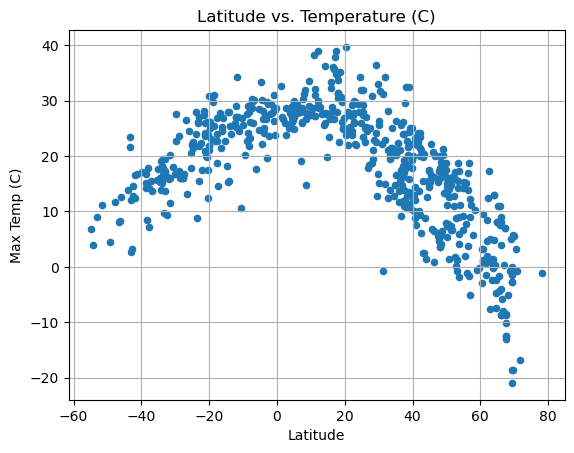

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df['Max Temp (C)'] = city_data_df['Max Temp'] - 273.15

# Incorporate the other graph properties
city_data_df.plot(kind= "scatter", x= "Lat", y= "Max Temp (C)", xlabel= "Latitude", grid=True, title = "Latitude vs. Temperature (C)")



# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

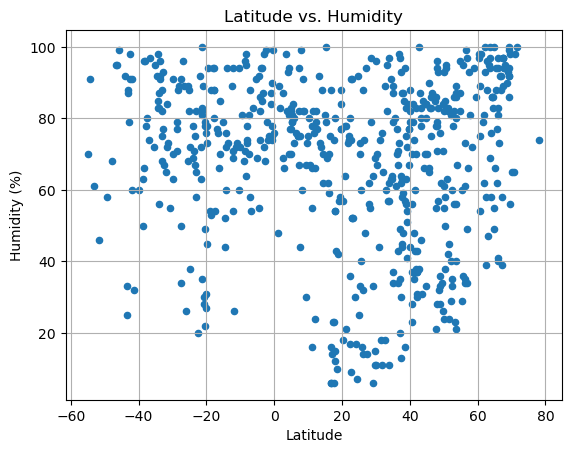

In [16]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind= "scatter", x= "Lat", y= "Humidity", grid=True, title = "Latitude vs. Humidity", xlabel = "Latitude",ylabel= "Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

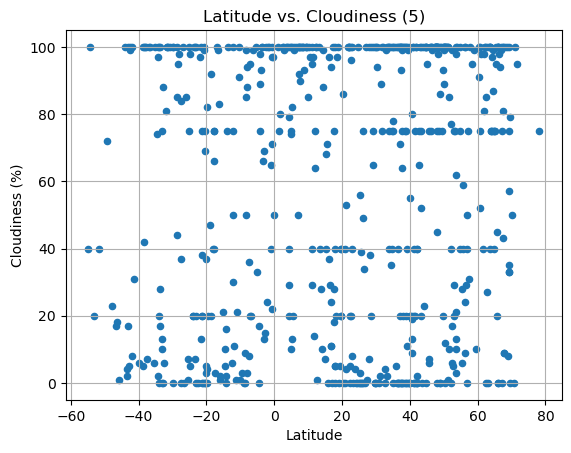

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind= "scatter", x= "Lat", y= "Cloudiness", grid=True, title = "Latitude vs. Cloudiness (5)", xlabel = "Latitude",ylabel= "Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

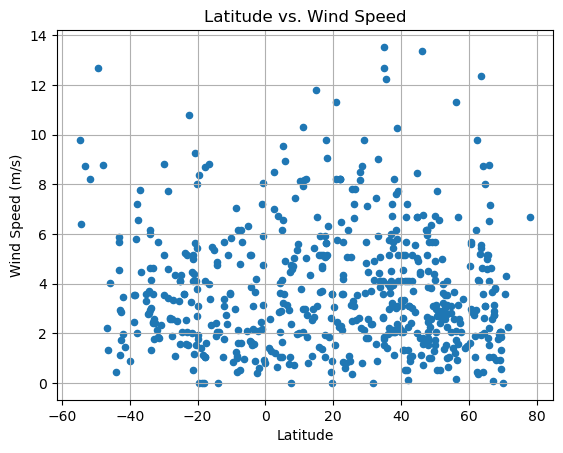

In [32]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(kind= "scatter", x= "Lat", y= "Wind Speed", grid=True, title = "Latitude vs. Wind Speed", xlabel = "Latitude",ylabel= "Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

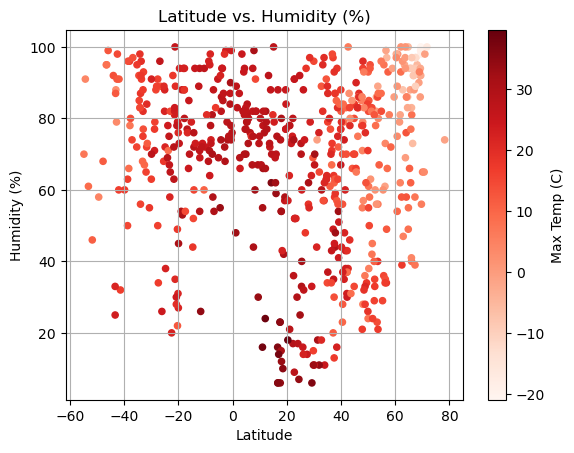

In [34]:
# CHALLENGE: Build the scatter plots for latitude vs. humidity (and Map Temp (C) is represented in color.)
# Incorporate the other graph properties
city_data_df.plot(kind= "scatter", x= "Lat", y= "Humidity", grid=True, title = "Latitude vs. Humidity (%)", xlabel = "Latitude",ylabel= "Humidity (%)", c = "Max Temp (C)", cmap="Reds")

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linregplot(x_values,y_values,x_name,y_name):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    reg_values = x_values * slope + intercept
    line_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
    print(f"R-Value is: {r_value}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,reg_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize= 15, color = 'red')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,polyarnyy,69.1989,33.4478,271.68,92,35,1.90,RU,1683398290,-1.47
2,puerto armuelles,8.2833,-82.8667,305.14,60,100,4.72,PA,1683398290,31.99
3,sitka,57.0531,-135.3300,282.09,66,75,2.57,US,1683398290,8.94
4,ribeira grande,38.5167,-28.7000,291.37,94,75,7.60,PT,1683398119,18.22
6,ranikhet,29.6500,79.4167,286.00,69,0,1.82,IN,1683398291,12.85


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,277.60,58,72,12.67,TF,1683398290,4.45
5,richards bay,-28.7830,32.0377,296.74,71,44,4.59,ZA,1683398291,23.59
8,puerto deseado,-47.7503,-65.8938,284.87,68,23,8.77,AR,1683398292,11.72
13,zvishavane,-20.3267,30.0665,290.59,49,0,1.53,ZW,1683398293,17.44
14,adamstown,-25.0660,-130.1015,295.24,82,100,4.11,PN,1683398293,22.09


###  Temperature vs. Latitude Linear Regression Plot

R-Value is: -0.8344207675614714


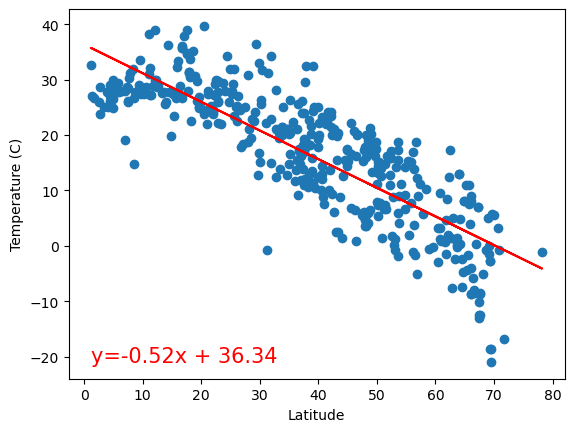

In [76]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df['Lat'].values
temp = northern_hemi_df['Max Temp (C)'].values

linregplot(lat,temp,'Latitude','Temperature (C)')

R-Value is: 0.7709924781618472


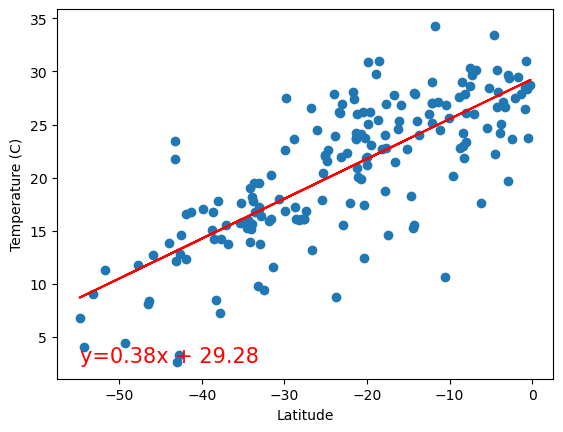

In [77]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat'].values
south_temp = southern_hemi_df['Max Temp (C)'].values

linregplot(south_lat,south_temp,'Latitude','Temperature (C)')

**Discussion about the linear relationship:** Based on the linear regression and r-values for both hemispheres, the Northern Hemisphere latitude and temperature have a strong negative relationship while the Southern Hemisphere has a strong positive relationship.

### Humidity vs. Latitude Linear Regression Plot

R-Value is: 0.15964678516455375


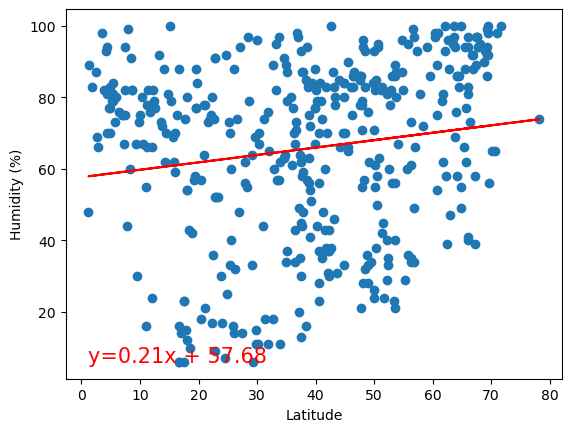

In [78]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat'].values
north_hum = northern_hemi_df['Humidity'].values

linregplot(north_lat,north_hum,"Latitude","Humidity (%)")

R-Value is: 0.051441966133978785


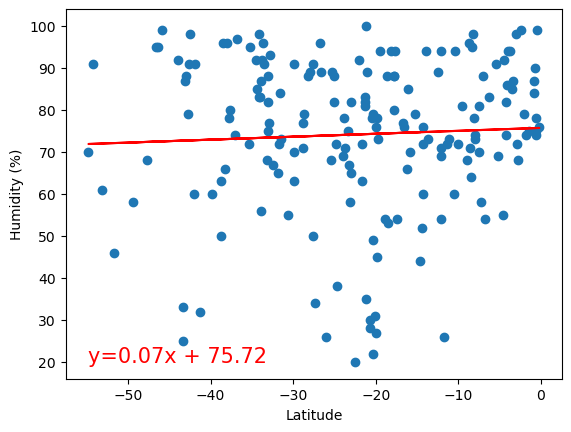

In [79]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'].values,southern_hemi_df['Humidity'].values,"Latitude","Humidity (%)")

**Discussion about the linear relationship:** There is a very weak (practically non existant) relationship between humidity and latitude for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R-Value is: 0.027303342647740425


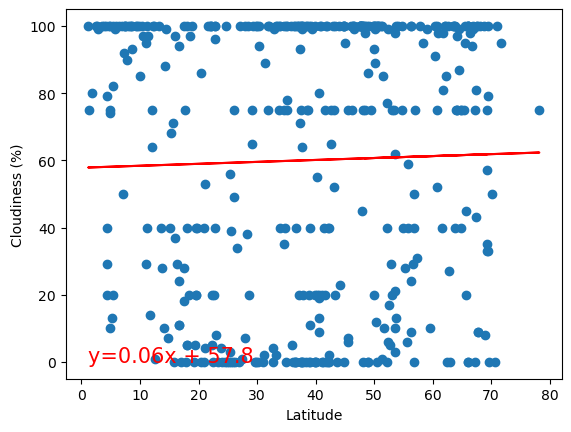

In [80]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'].values,northern_hemi_df['Cloudiness'].values,"Latitude","Cloudiness (%)")

R-Value is: 0.029019328797234876


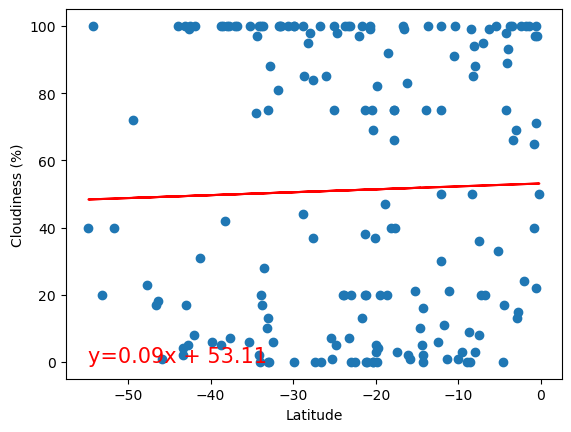

In [81]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'].values,southern_hemi_df['Cloudiness'].values,"Latitude","Cloudiness (%)")

**Discussion about the linear relationship:** There is a very weak(virtually non-existant) positive relationship between cloudiness and latitude for both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

R-Value is: -0.13235058696901508


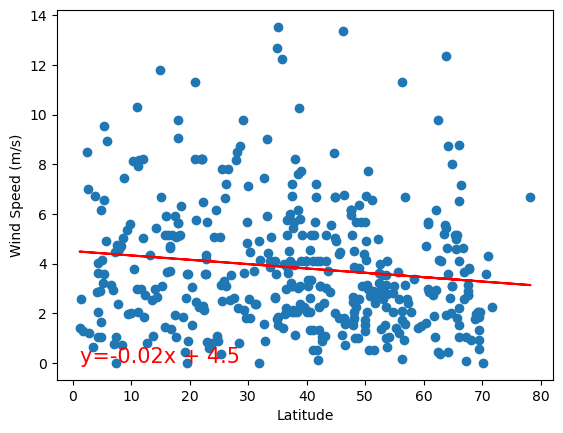

In [82]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'].values,northern_hemi_df['Wind Speed'].values,"Latitude","Wind Speed (m/s)")

R-Value is: -0.2235545082166092


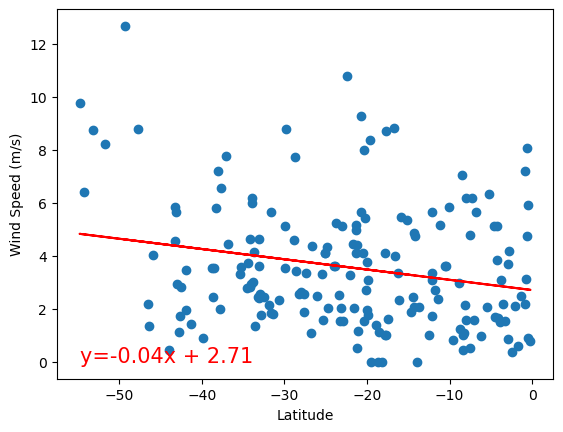

In [83]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'].values,southern_hemi_df['Wind Speed'].values,"Latitude","Wind Speed (m/s)")

**Discussion about the linear relationship:** There is a weak negative relationship between wind speed
 and latitude for both hemispheres.